In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from collections import Counter
import pandas as pd
import seaborn as sns

plt.rcParams['figure.figsize'] = (15, 5)
boston = pd.read_csv("results_2014.csv")

## Understanding the Data

In [2]:
boston.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [3]:
boston.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')

There are 20 features.
name, gender, age, city, country are straightforward. 

10k, 25k, 30k, 35k are the the time it took to complete at the corresponding distances. 

Official is the final time.

Pace measures the speed of athleths. Unit of measurement is not clear. I assume minutes per mile.

I don't know what these attributes mean: overall, division, bib, genderdiv, ctz 

In [4]:
# looking at women athleths from Ethiopia
boston[(boston.country == "ETH") & (boston.gender == 'F')]

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
17,32.57,"Deba, Buzunesh",2,82.43,F,26,139.98,F10,2,NaN,...,25,5.35,NaN,99.35,16.20,69.47,65.83,ETH,Arsi,132.65
25,33.02,"Esayias, Yeshi",12,85.03,F,28,147.67,F14,12,NaN,...,71,5.63,NaN,102.92,16.22,71.45,67.62,ETH,Arsi,139.70
31,32.57,"Oljira, Belaynesh",11,82.43,F,23,144.35,F16,11,NaN,...,48,5.52,NaN,99.53,16.20,69.47,65.83,ETH,Wellega,135.80
55,32.57,"Melkamu, Meselech",5,82.45,F,29,141.47,F25,5,NaN,...,33,5.40,NaN,99.35,16.22,69.47,65.83,ETH,Addis Ababa,133.20


In [5]:
# sort by their offical times
boston_men = boston[boston.gender == 'M'].sort_values(by="official")
boston_women = boston[boston.gender == 'F'].sort_values(by="official")

In [6]:
# see top men runners from all categories
boston_men[['name', 'country', 'bib', 'division', 'official', 'overall', 'pace']].head(40)

,name,country,bib,division,official,overall,pace
2,"Van Dyk, Ernst F.",RSA,W2,1,80.60,1,3.08
4,"Hokinoue, Kota",JPN,W3,2,81.23,2,3.10
8,"Soejima, Masazumi",JPN,W6,3,81.23,3,3.10
6,"Hug, Marcel E.",SUI,W4,4,84.65,4,3.23
16,"Madera, Jordi",ESP,W9,5,84.70,5,3.23
30,"George, Joshua",USA,W15,6,84.82,6,3.25
18,"Hamerlak, Tomasz",POL,W10,7,84.88,7,3.25
0,"Yamamoto, Hiroyuki",JPN,W1,8,85.25,8,3.27
40,"Senbeta, James",USA,W19,9,85.38,9,3.27
58,"Tana, Rawat",THA,W26,10,86.90,10,3.32


These ranks all athletes from all categories. Wheel Chair athletes finish in a shorter period of time. We see them on the top of the list. The elite runners who stood one to three are on the bottom of the top 50 list.

In [7]:
boston_men.loc[[39,11,20]]

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
39,30.48,"Keflezighi, Meb",1,76.00,M,38,128.62,19,1,NaN,...,1,4.92,CA,91.17,15.15,64.35,61.08,USA,San Diego,121.82
11,30.52,"Chebet, Wilson",2,76.97,M,28,128.80,7,2,NaN,...,2,4.92,NaN,92.52,15.18,64.87,61.63,KEN,Marakwet,121.95
20,30.50,"Chepkwony, Frankline",3,76.95,M,29,128.83,11,3,NaN,...,3,4.92,NaN,92.52,15.18,64.90,61.63,KEN,Koibatek,122.22


gender_div and overall show sequential rank

In [8]:
boston_women[['name', 'country', 'bib', 'division', 'official', 'overall', 'pace', 'genderdiv']][0:30]

,name,country,bib,division,official,overall,pace,genderdiv
124,"McFadden, Tatyana",USA,W101,1,95.10,17,3.63,1
133,"Tsuchida, Wakako",JPN,W105,2,97.40,24,3.72,2
141,"Scaroni, Susannah",USA,W108,3,98.55,27,3.77,3
139,"Schar, Manuela",SUI,W107,4,99.65,29,3.82,4
136,"Woods, Shelly",GBR,W106,5,101.70,31,3.88,5
143,"Roy, Diane",CAN,W109,6,103.67,32,3.97,6
130,"Reilly, Shirley S.",USA,W104,7,104.57,37,4.00,7
127,"McGrory, Amanda M.",USA,W103,8,110.87,42,4.23,8
146,"Moore, Jill",USA,W111,9,133.97,46,5.12,9
148,"Rausin, Arielle",USA,W112,10,137.05,48,5.23,10


Similary for women, let us see the elite women winners

In [9]:
boston_women.loc[[1, 17,3]]

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
17,32.57,"Deba, Buzunesh",2,82.43,F,26,139.98,F10,2,NaN,...,25,5.35,NaN,99.35,16.20,69.47,65.83,ETH,Arsi,132.65
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95


Still, gender div shows the correct standings. Overall is sorted. These three athleths are not ranked as the top 3 overall.

#### Genderdiv vs division

In [10]:
boston_women.genderdiv.value_counts().value_counts()

1    14345
2       11
Name: genderdiv, dtype: int64

This may signify 14345+11 women competed in elite women category. Only 11 women in wheel chair

In [11]:
boston_men.genderdiv.value_counts().value_counts()

1    17533
2       42
Name: genderdiv, dtype: int64

17533+42 men competed in elite men category. Only 42 men in wheel chair

In [12]:
boston_men.division.value_counts().value_counts()

1     2992
4      697
5      666
6      575
7      371
2      291
3      153
8      125
10      31
11       5
12       3
9        2
Name: division, dtype: int64

In [13]:
boston_women.division.value_counts().value_counts()

1     4643
3      807
4      722
5      427
6      221
7      100
2       39
8        9
9        7
10       3
11       1
Name: division, dtype: int64

Divisions are shaared by many atleths. I assume it shows a groups of athleths at a given time. May be at the 20th killo meter

### Data Cleaning

In [14]:
boston.shape

(31984, 21)

In [15]:
boston.isnull().sum()

10k              0
name             0
division         0
25k              0
gender           0
age              0
official         0
bib              0
genderdiv        0
ctz          30740
35k              0
overall          0
pace             0
state         2576
30k              0
5k               0
half             0
20k              0
country          0
city             1
40k              0
dtype: int64

ctz is a clearly useless. State holds good information to calculate cluster similarity

States are not used in other countries except USA. Let us confirm.

In [16]:
boston[~(boston.country == 'USA')].state.isnull().sum()

2576

See, all 2576 missing states are for non-us countries.

In [17]:
# replace missing states with No_State
boston.state = boston.state.fillna("No-State")

In [18]:
# remove ctz
boston = boston.drop("ctz", axis=1)

In [19]:
# fill missing cities
boston.city = boston.city.fillna("Unknown_city")

In [20]:
boston.isnull().sum()

10k          0
name         0
division     0
25k          0
gender       0
age          0
official     0
bib          0
genderdiv    0
35k          0
overall      0
pace         0
state        0
30k          0
5k           0
half         0
20k          0
country      0
city         0
40k          0
dtype: int64

### Data Preprocessing

In [21]:
boston.dtypes

10k           object
name          object
division       int64
25k           object
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
35k           object
overall        int64
pace         float64
state         object
30k           object
5k            object
half          object
20k           object
country       object
city          object
40k           object
dtype: object

There are hidden missing values inside each attribute. Hyphens show the athlete didn't reach that time

In [22]:
for i in [5,10, 20, 25, 30,35,40]:
    print(str(i) + "k nulls count: " , (boston[str(i) + 'k'] == "-").sum())

5k nulls count:  52
10k nulls count:  50
20k nulls count:  51
25k nulls count:  216
30k nulls count:  40
35k nulls count:  34
40k nulls count:  39


Replace them with zero. Forgetting data entry mistakes, it indicates that the runner didn't reach that level of time. I wonder why 216 athlets have no 25k time but only 40 runners miss 30k times.

In [23]:
for i in [5,10, 20, 25, 30,35,40]:
    boston[str(i) + "k"].replace('-','0', inplace=True)

In [24]:
for i in [5,10, 20, 25, 30,35,40]:
    print(str(i) + "k '-' count: " , (boston[str(i) + 'k'] == "-").sum())

5k '-' count:  0
10k '-' count:  0
20k '-' count:  0
25k '-' count:  0
30k '-' count:  0
35k '-' count:  0
40k '-' count:  0


In [25]:
# change their datatype to float64
for i in [5,10,20, 25, 30,35,40]:
    boston[str(i) + 'k'] = boston[str(i) + 'k'].astype("float64")

In [26]:
boston.half.replace("-", "0", inplace=True)
boston.half = boston.half.astype("float64")
boston.division = boston.division.astype("float64")
boston.overall = boston.overall.astype("float64")
boston.genderdiv = boston.genderdiv.astype("float64")
boston.age = boston.age.astype("float64")

In [27]:
boston.dtypes

10k          float64
name          object
division     float64
25k          float64
gender        object
age          float64
official     float64
bib           object
genderdiv    float64
35k          float64
overall      float64
pace         float64
state         object
30k          float64
5k           float64
half         float64
20k          float64
country       object
city          object
40k          float64
dtype: object

In [28]:
boston.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8.0,47.67,M,47.0,85.25,W1,8.0,71.40,8.0,3.27,No-State,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1.0,82.43,F,33.0,138.95,F1,1.0,116.37,21.0,5.30,No-State,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1.0,45.80,M,41.0,80.60,W2,1.0,67.42,1.0,3.08,No-State,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3.0,82.43,F,24.0,140.58,F2,3.0,116.37,27.0,5.37,No-State,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2.0,46.37,M,40.0,81.23,W3,2.0,67.83,2.0,3.10,No-State,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [29]:
(boston.country.value_counts() > 20).sum()

27

In [30]:
boston[boston.country == "KEN"]

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
1,32.58,"Jeptoo, Rita",1.0,82.43,F,33.0,138.95,F1,1.0,116.37,21.0,5.30,No-State,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
5,32.58,"Sumgong, Jemima Jelagat",4.0,82.45,F,29.0,140.68,F3,4.0,116.37,28.0,5.37,No-State,99.33,16.22,69.47,65.83,KEN,Nandi,132.95
10,32.58,"Cherop, Sharon",8.0,82.45,F,30.0,143.00,F6,8.0,116.92,40.0,5.47,No-State,99.35,16.22,69.47,65.85,KEN,Marakwet,134.65
11,30.52,"Chebet, Wilson",2.0,76.97,M,28.0,128.80,7,2.0,107.47,2.0,4.92,No-State,92.52,15.18,64.87,61.63,KEN,Marakwet,121.95
13,32.58,"Kilel, Caroline",17.0,85.55,F,33.0,152.07,F7,17.0,124.22,121.0,5.80,No-State,104.62,16.22,71.10,67.15,KEN,Bomet,143.50
20,30.50,"Chepkwony, Frankline",3.0,76.95,M,29.0,128.83,11,3.0,107.47,3.0,4.92,No-State,92.52,15.18,64.90,61.63,KEN,Koibatek,122.22
22,30.50,"Kogo, Micah",17.0,76.97,M,27.0,137.20,12,17.0,109.12,17.0,5.23,No-State,92.52,15.17,64.88,61.62,KEN,Eldoret,128.18
28,33.02,"Ongori, Philes",9.0,83.43,F,27.0,143.37,F15,9.0,118.40,42.0,5.48,No-State,100.80,16.35,70.27,66.58,KEN,Kisii,135.67
29,30.52,"Lonyangata, Paul",9.0,76.97,M,31.0,132.57,15,9.0,108.17,9.0,5.07,No-State,92.52,15.18,64.90,61.63,KEN,Eldoret,124.98
32,30.52,"Kimurer, Joel",6.0,76.97,M,26.0,131.05,16,6.0,108.02,6.0,5.00,No-State,92.52,15.18,64.87,61.63,KEN,Iten,123.83


In [31]:
gender_dummies = pd.get_dummies(boston.gender)

In [32]:
boston_sel = boston[["age", "official", "genderdiv", "40k", "35k", "30k", "25k", "20k", "10k", "5k", "half", "pace"]]

In [33]:
boston_data = pd.concat([boston_sel, gender_dummies], axis=1)
boston_data.head()

,age,official,genderdiv,40k,35k,30k,25k,20k,10k,5k,half,pace,F,M
0,47.0,85.25,8.0,80.43,71.40,59.18,47.67,37.65,17.37,8.02,39.72,3.27,0,1
1,33.0,138.95,1.0,132.10,116.37,99.33,82.43,65.83,32.58,16.22,69.47,5.30,1,0
2,41.0,80.60,1.0,76.10,67.42,56.45,45.80,36.10,16.62,7.75,38.03,3.08,0,1
3,24.0,140.58,3.0,132.95,116.37,99.33,82.43,65.83,32.57,16.20,69.47,5.37,1,0
4,40.0,81.23,2.0,76.72,67.83,57.03,46.37,36.58,17.12,8.02,38.60,3.10,0,1


#### Rescale, Split and PCA transform

In [34]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [35]:
boston_data.M = boston_data.M.astype("float64")
boston_data.F = boston_data.F.astype("float64")

In [36]:
sc = StandardScaler()
boston_data = sc.fit_transform(boston_data)
boston_data.shape

(31984, 14)

In [37]:
km_model = KMeans(n_clusters=10, n_jobs=-1)
pred = km_model.fit_predict(boston_data)

In [38]:
pred

array([6, 6, 6, ..., 1, 1, 9])

In [39]:
X_pca = PCA(n_components=2).fit_transform(boston_data)
X_norm = boston_data.copy()

In order to check consistency of a clustering solution. I divided the data into 4 equal parts. Created 2 principal components for each sample. The principal components will be used to plot the data with the cluster labels, since plotting all features is impossible.

Kmeans, Minbatchkmeans, Meanshift and Spectral clustering are used later

In [40]:
# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_norm,
    X_pca,
    test_size=0.5,
    random_state=42)

# Then we halve the halves.
X1, X2, X_pca1, X_pca2 = train_test_split(
    X_half1,
    X_pcahalf1,
    test_size=0.5,
    random_state=42)
X3, X4, X_pca3, X_pca4 = train_test_split(
    X_half2,
    X_pcahalf2,
    test_size=0.5,
    random_state=42)

### Modeling

In [54]:
from sklearn.cluster import KMeans, MiniBatchKMeans, MeanShift, SpectralClustering

#### Kmeans

In [56]:
ypred = pd.DataFrame()
for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=42).fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

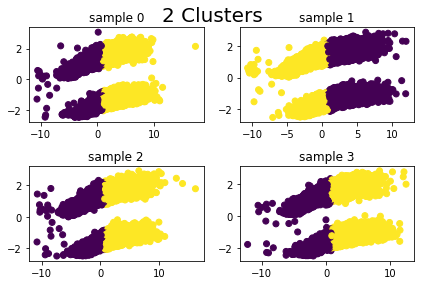

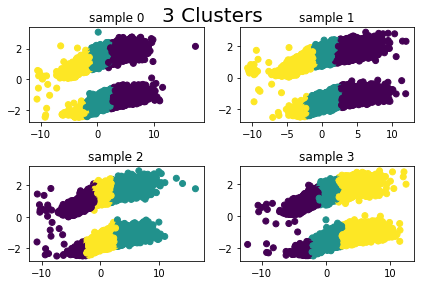

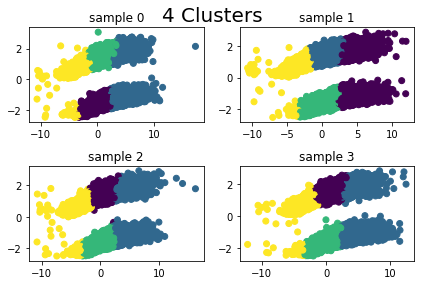

In [57]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(2, 2)
    
    # Make a plot for each sample.
    for i in range(4):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_sub, y_sub, c=c)
        axarr[rows, cols].set_title('sample {}'.format(i))
        #axarr[rows, cols].set_xlim([-.3, .3])
        #axarr[rows, cols].set_ylim([-.3, .3])
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

#### MiniBatchKmeans

In [58]:
ypred = pd.DataFrame()
for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = MiniBatchKMeans(n_clusters=nclust, random_state=42).fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

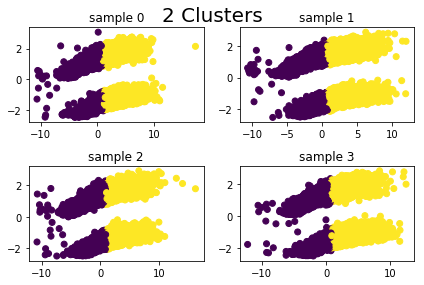

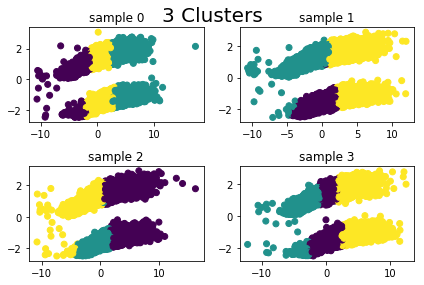

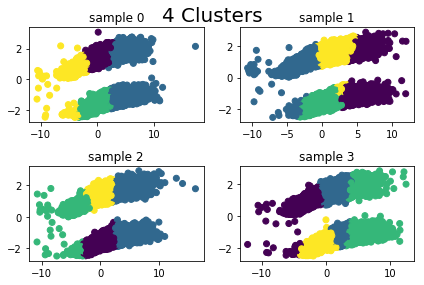

In [59]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(2, 2)
    
    # Make a plot for each sample.
    for i in range(4):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_sub, y_sub, c=c)
        axarr[rows, cols].set_title('sample {}'.format(i))
        #axarr[rows, cols].set_xlim([-.3, .3])
        #axarr[rows, cols].set_ylim([-.3, .3])
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

Both algorithms performed good for 2 clusters. Kmeans has better consistency for 3 and 4 clusters. 

#### Silhouette_Score

In [43]:
# using pairwise distances because there is no ground truth
from sklearn import metrics
from sklearn.metrics import pairwise_distances

for sample in [X1, X2, X3, X4]:
    model = KMeans(n_clusters=2, random_state=42).fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

0.42063267417255484
0.4276629072248846
0.4183902930691903
0.4237714413048146


In [50]:
# using pairwise distances because there is groud truth
from sklearn import metrics
from sklearn.metrics import pairwise_distances

for sample in [X1, X2, X3, X4]:
    model = MiniBatchKMeans(n_clusters=2, random_state=42).fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

0.42488668281193254
0.42594718436367046
0.4240240881357853
0.42403019804533126


Mini batch is a little better on average. 

## Telling a Story

In [72]:
model = MiniBatchKMeans(n_clusters=2, random_state=42).fit(X_norm)

In [73]:
model.labels_

array([0, 0, 0, ..., 1, 1, 0])

In [137]:
boston["labels"] = model.labels_

In [156]:
boston.sort_values(by="official").labels.value_counts()

0    21485
1    10499
Name: labels, dtype: int64

In [159]:
# the first 17000 athlets are assigned to cluster 0
(boston.sort_values(by="official").labels[:17000] != 0).sum()

0

In [193]:
# among the remaining ones(~14000) 10499 are assigned to cluster 1
(boston.sort_values(by="official").labels[17000:] != 0).sum()

10499

In [182]:
boston.sort_values(by="official").labels[40000:]

Series([], Name: labels, dtype: int32)

In [171]:
len(boston)

31984

In [75]:
model.labels_[39]

0

In [86]:
X_norm.shape

(31984, 14)

In [99]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=10)
knn.fit(X_norm)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=10, p=2, radius=1.0)

In [100]:
neighbors = knn.kneighbors(X_norm, return_distance=True)

#### Which athletes are similar to the  men race medalists of the boston marathon?

In [109]:
boston[(boston.genderdiv.isin([1,2,3])) & (boston.gender == "M")]

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
2,16.62,"Van Dyk, Ernst F.",1.0,45.80,M,41.0,80.60,W2,1.0,67.42,1.0,3.08,No-State,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
4,17.12,"Hokinoue, Kota",2.0,46.37,M,40.0,81.23,W3,2.0,67.83,2.0,3.10,No-State,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72
8,17.12,"Soejima, Masazumi",3.0,46.37,M,43.0,81.23,W6,3.0,67.83,3.0,3.10,No-State,57.03,8.00,38.60,36.60,JPN,Isahaya,76.70
11,30.52,"Chebet, Wilson",2.0,76.97,M,28.0,128.80,7,2.0,107.47,2.0,4.92,No-State,92.52,15.18,64.87,61.63,KEN,Marakwet,121.95
20,30.50,"Chepkwony, Frankline",3.0,76.95,M,29.0,128.83,11,3.0,107.47,3.0,4.92,No-State,92.52,15.18,64.90,61.63,KEN,Koibatek,122.22
39,30.48,"Keflezighi, Meb",1.0,76.00,M,38.0,128.62,19,1.0,106.62,1.0,4.92,CA,91.17,15.15,64.35,61.08,USA,San Diego,121.82


In [130]:
# all are cluster 0
model.labels_[[2,4,8,11,20,39]]

array([0, 0, 0, 0, 0, 0])

#### Van Dyk, Ernst F.

He was the champion in the men wheel chair race. 

In [110]:
boston.loc[neighbors[1][2]]

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
2,16.62,"Van Dyk, Ernst F.",1.0,45.80,M,41.0,80.60,W2,1.0,67.42,1.0,3.08,No-State,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
4,17.12,"Hokinoue, Kota",2.0,46.37,M,40.0,81.23,W3,2.0,67.83,2.0,3.10,No-State,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72
8,17.12,"Soejima, Masazumi",3.0,46.37,M,43.0,81.23,W6,3.0,67.83,3.0,3.10,No-State,57.03,8.00,38.60,36.60,JPN,Isahaya,76.70
18,18.17,"Hamerlak, Tomasz",7.0,49.15,M,38.0,84.88,W10,7.0,70.83,7.0,3.25,No-State,59.92,8.67,41.20,39.05,POL,Bystra,80.18
0,17.37,"Yamamoto, Hiroyuki",8.0,47.67,M,47.0,85.25,W1,8.0,71.40,8.0,3.27,No-State,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
16,17.13,"Madera, Jordi",5.0,47.45,M,34.0,84.70,W9,5.0,70.60,5.0,3.23,No-State,58.73,8.02,39.12,36.98,ESP,Les Franquesas,79.92
58,18.77,"Tana, Rawat",10.0,49.75,M,36.0,86.90,W26,10.0,72.62,10.0,3.32,No-State,61.17,8.98,41.52,39.37,THA,Bangkok,82.18
23,18.17,"Botello Jimenez, Rafael",12.0,49.15,M,35.0,86.95,W12,12.0,72.70,12.0,3.32,No-State,60.87,8.68,41.20,39.05,ESP,Manlleu,82.17
24,18.30,"Filteau, Michel",14.0,50.33,M,47.0,89.40,W13,14.0,74.95,14.0,3.42,QC,62.33,8.67,41.80,39.63,CAN,St-Jean Baptiste,84.48
43,18.77,"Bleakney, Adam",16.0,52.07,M,38.0,92.87,W20,16.0,77.78,16.0,3.55,IL,64.87,8.92,43.00,40.83,USA,Champaign,87.70


In [111]:
neighbors[0][2]

array([0.        , 0.13003974, 0.19962314, 0.48587141, 0.58958292,
       0.65196642, 0.69031394, 0.69758296, 0.76884384, 0.79808577])

His neighbours are all wheel chair racers. The sliver and bronze medalists are most similar to the winner

#### Hokinoue, Kota	

In [112]:
boston.loc[neighbors[1][4]]

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
4,17.12,"Hokinoue, Kota",2.0,46.37,M,40.0,81.23,W3,2.0,67.83,2.0,3.10,No-State,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72
2,16.62,"Van Dyk, Ernst F.",1.0,45.80,M,41.0,80.60,W2,1.0,67.42,1.0,3.08,No-State,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
8,17.12,"Soejima, Masazumi",3.0,46.37,M,43.0,81.23,W6,3.0,67.83,3.0,3.10,No-State,57.03,8.00,38.60,36.60,JPN,Isahaya,76.70
18,18.17,"Hamerlak, Tomasz",7.0,49.15,M,38.0,84.88,W10,7.0,70.83,7.0,3.25,No-State,59.92,8.67,41.20,39.05,POL,Bystra,80.18
16,17.13,"Madera, Jordi",5.0,47.45,M,34.0,84.70,W9,5.0,70.60,5.0,3.23,No-State,58.73,8.02,39.12,36.98,ESP,Les Franquesas,79.92
58,18.77,"Tana, Rawat",10.0,49.75,M,36.0,86.90,W26,10.0,72.62,10.0,3.32,No-State,61.17,8.98,41.52,39.37,THA,Bangkok,82.18
23,18.17,"Botello Jimenez, Rafael",12.0,49.15,M,35.0,86.95,W12,12.0,72.70,12.0,3.32,No-State,60.87,8.68,41.20,39.05,ESP,Manlleu,82.17
0,17.37,"Yamamoto, Hiroyuki",8.0,47.67,M,47.0,85.25,W1,8.0,71.40,8.0,3.27,No-State,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
43,18.77,"Bleakney, Adam",16.0,52.07,M,38.0,92.87,W20,16.0,77.78,16.0,3.55,IL,64.87,8.92,43.00,40.83,USA,Champaign,87.70
24,18.30,"Filteau, Michel",14.0,50.33,M,47.0,89.40,W13,14.0,74.95,14.0,3.42,QC,62.33,8.67,41.80,39.63,CAN,St-Jean Baptiste,84.48


In [113]:
neighbors[0][4]

array([0.        , 0.13003974, 0.26514424, 0.36387449, 0.55053788,
       0.5647747 , 0.57566734, 0.64865892, 0.69857093, 0.78213196])

The same 10 people are returned as neighbors for the silver medalist in the men wheel chair division.

It is interesting to see that Kota is similar to Madera Jordi than his country man, Hiroyuki. And Hiroyuki is closer to the winner than Kota and Madera eventhough he stood 8th in the race.

Hamerlak, Tomaz stood 7th and he is very similar to the top two finishers.

#### Keflezighi, Meb

In [115]:
boston.loc[neighbors[1][39]]

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
39,30.48,"Keflezighi, Meb",1.0,76.00,M,38.0,128.62,19,1.0,106.62,1.0,4.92,CA,91.17,15.15,64.35,61.08,USA,San Diego,121.82
37,30.52,"Abdirahman, Abdi",16.0,77.58,M,35.0,136.10,18,16.0,110.90,16.0,5.20,AZ,93.82,15.17,65.28,61.83,USA,Tucson,128.17
26,30.53,"Annani, Adil",10.0,76.97,M,33.0,132.72,14,10.0,109.15,10.0,5.07,No-State,92.60,15.18,64.88,61.63,MAR,Marrakesh,125.23
68,31.37,"Morgan, Mike G.",13.0,78.98,M,34.0,134.67,31,13.0,111.45,13.0,5.15,MI,95.25,15.58,66.55,63.07,USA,Rochester Hills,127.50
50,30.82,"Shafar, Vitaliy",4.0,76.85,M,32.0,129.62,23,4.0,108.00,4.0,4.95,No-State,92.50,15.40,64.93,61.62,UKR,Lutsk,122.97
29,30.52,"Lonyangata, Paul",9.0,76.97,M,31.0,132.57,15,9.0,108.17,9.0,5.07,No-State,92.52,15.18,64.90,61.63,KEN,Eldoret,124.98
35,30.52,"April, Lusapho",15.0,76.95,M,31.0,134.98,17,15.0,108.32,15.0,5.15,No-State,92.52,15.18,64.88,61.63,RSA,Uitenhage,126.32
9,30.48,"Hall, Ryan",20.0,77.68,M,31.0,137.83,6,20.0,112.27,20.0,5.27,CA,94.78,15.15,65.23,61.78,USA,Redding,129.83
62,30.48,"Boit, Josphat",11.0,76.10,M,30.0,132.87,28,11.0,108.13,11.0,5.08,CA,91.97,15.17,64.35,61.08,USA,Mammoth Lakes,124.72
47,30.52,"Arciniaga, Nicholas",7.0,77.12,M,30.0,131.78,22,7.0,109.13,7.0,5.03,AZ,93.05,15.18,65.07,61.77,USA,Flagstaff,124.85


In [116]:
neighbors[0][39]

array([0.        , 0.3864678 , 0.46866311, 0.49184368, 0.54008549,
       0.63528065, 0.65164937, 0.71108491, 0.71976334, 0.72153609])

Meb's neighbors include many athlethes who stood below 10. The wheel chair race has very small participants but the main race involves more than 30000 participants. Meb might be a surprise winner because those athleths similar to him are way behind.

In [117]:
boston.loc[neighbors[1][11]]

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
11,30.52,"Chebet, Wilson",2.0,76.97,M,28.0,128.80,7,2.0,107.47,2.0,4.92,No-State,92.52,15.18,64.87,61.63,KEN,Marakwet,121.95
20,30.50,"Chepkwony, Frankline",3.0,76.95,M,29.0,128.83,11,3.0,107.47,3.0,4.92,No-State,92.52,15.18,64.90,61.63,KEN,Koibatek,122.22
7,30.48,"Geneti, Markos",5.0,76.95,M,29.0,129.83,5,5.0,107.47,5.0,4.97,No-State,92.52,15.17,64.85,61.62,ETH,Addis Ababa,122.80
54,30.53,"Eggleston, Jeffrey",8.0,77.07,M,29.0,131.95,24,8.0,108.80,8.0,5.03,CO,92.82,15.20,65.08,61.75,USA,Boulder,124.80
32,30.52,"Kimurer, Joel",6.0,76.97,M,26.0,131.05,16,6.0,108.02,6.0,5.00,No-State,92.52,15.18,64.87,61.63,KEN,Iten,123.83
47,30.52,"Arciniaga, Nicholas",7.0,77.12,M,30.0,131.78,22,7.0,109.13,7.0,5.03,AZ,93.05,15.18,65.07,61.77,USA,Flagstaff,124.85
64,30.53,"Leon, Craig",12.0,77.58,M,29.0,134.47,29,12.0,110.30,12.0,5.13,OR,93.83,15.20,65.35,61.87,USA,Eugene,126.77
62,30.48,"Boit, Josphat",11.0,76.10,M,30.0,132.87,28,11.0,108.13,11.0,5.08,CA,91.97,15.17,64.35,61.08,USA,Mammoth Lakes,124.72
57,30.83,"Sakai, Koichi",14.0,78.02,M,28.0,134.93,26,14.0,111.12,14.0,5.15,No-State,94.33,15.42,65.70,62.30,JPN,Chiba,127.67
22,30.50,"Kogo, Micah",17.0,76.97,M,27.0,137.20,12,17.0,109.12,17.0,5.23,No-State,92.52,15.17,64.88,61.62,KEN,Eldoret,128.18


In [119]:
neighbors[0][11]

array([0.        , 0.08857687, 0.09562498, 0.13778881, 0.19050921,
       0.20701359, 0.21698254, 0.222844  , 0.24182627, 0.27387975])

The largest distance is small. Chebet is like many athlethes. Many top finishers are included in the neighbors

#### Which athletes are similar to women top finishers?

In [131]:
boston[(boston.genderdiv.isin([1,2,3])) & (boston.gender == "F")]

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
1,32.58,"Jeptoo, Rita",1.0,82.43,F,33.0,138.95,F1,1.0,116.37,21.0,5.30,No-State,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
3,32.57,"Dibaba, Mare",3.0,82.43,F,24.0,140.58,F2,3.0,116.37,27.0,5.37,No-State,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
17,32.57,"Deba, Buzunesh",2.0,82.43,F,26.0,139.98,F10,2.0,116.38,25.0,5.35,No-State,99.35,16.20,69.47,65.83,ETH,Arsi,132.65
124,20.65,"McFadden, Tatyana",1.0,54.18,F,25.0,95.10,W101,1.0,79.15,17.0,3.63,IL,66.48,10.12,45.43,43.12,USA,Champaign,89.87
133,19.75,"Tsuchida, Wakako",2.0,54.88,F,39.0,97.40,W105,2.0,81.58,24.0,3.72,No-State,68.18,9.25,45.42,43.15,JPN,Tama City Tokyo,92.07
141,20.65,"Scaroni, Susannah",3.0,55.75,F,22.0,98.55,W108,3.0,82.17,27.0,3.77,IL,68.93,10.12,46.33,43.95,USA,Urbana,93.08


In [132]:
# all are cluster 0
model.labels_[[1,3,17,124,133,141]]

array([0, 0, 0, 0, 0, 0])

#### Jeptoo Rita

In [134]:
boston.loc[neighbors[1][1]]

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
1,32.58,"Jeptoo, Rita",1.0,82.43,F,33.0,138.95,F1,1.0,116.37,21.0,5.30,No-State,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
34,32.57,"Flanagan, Shalane",7.0,82.43,F,32.0,142.03,F17,7.0,116.63,37.0,5.43,OR,99.33,16.20,69.45,65.82,USA,Portland,134.00
10,32.58,"Cherop, Sharon",8.0,82.45,F,30.0,143.00,F6,8.0,116.92,40.0,5.47,No-State,99.35,16.22,69.47,65.85,KEN,Marakwet,134.65
5,32.58,"Sumgong, Jemima Jelagat",4.0,82.45,F,29.0,140.68,F3,4.0,116.37,28.0,5.37,No-State,99.33,16.22,69.47,65.83,KEN,Nandi,132.95
55,32.57,"Melkamu, Meselech",5.0,82.45,F,29.0,141.47,F25,5.0,116.37,33.0,5.40,No-State,99.35,16.22,69.47,65.83,ETH,Addis Ababa,133.20
15,33.93,"Linden, Desiree",10.0,85.03,F,30.0,143.90,F8,10.0,119.68,46.0,5.50,MI,102.40,16.92,71.68,67.92,USA,Rochester Hills,136.47
13,32.58,"Kilel, Caroline",17.0,85.55,F,33.0,152.07,F7,17.0,124.22,121.0,5.80,No-State,104.62,16.22,71.10,67.15,KEN,Bomet,143.50
28,33.02,"Ongori, Philes",9.0,83.43,F,27.0,143.37,F15,9.0,118.40,42.0,5.48,No-State,100.80,16.35,70.27,66.58,KEN,Kisii,135.67
25,33.02,"Esayias, Yeshi",12.0,85.03,F,28.0,147.67,F14,12.0,121.60,71.0,5.63,No-State,102.92,16.22,71.45,67.62,ETH,Arsi,139.70
42,33.93,"Marchant, Lanni",14.0,86.30,F,30.0,150.57,F20,14.0,123.47,105.0,5.75,ON,104.53,16.92,72.60,68.77,CAN,London,142.37


Mare dibaba and Deba Buzunesh(2nd and 3rd) are not in the top 10 neighbors of Jeptoo Rita

In [135]:
boston.loc[neighbors[1][3]]

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
3,32.57,"Dibaba, Mare",3.0,82.43,F,24.0,140.58,F2,3.0,116.37,27.0,5.37,No-State,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
31,32.57,"Oljira, Belaynesh",11.0,82.43,F,23.0,144.35,F16,11.0,117.58,48.0,5.52,No-State,99.53,16.20,69.47,65.83,ETH,Wellega,135.80
17,32.57,"Deba, Buzunesh",2.0,82.43,F,26.0,139.98,F10,2.0,116.38,25.0,5.35,No-State,99.35,16.20,69.47,65.83,ETH,Arsi,132.65
21,33.23,"Duliba, Aleksandra",6.0,83.40,F,26.0,141.48,F12,6.0,117.65,34.0,5.40,No-State,100.58,16.47,70.25,66.57,BLR,Minsk,134.20
28,33.02,"Ongori, Philes",9.0,83.43,F,27.0,143.37,F15,9.0,118.40,42.0,5.48,No-State,100.80,16.35,70.27,66.58,KEN,Kisii,135.67
5,32.58,"Sumgong, Jemima Jelagat",4.0,82.45,F,29.0,140.68,F3,4.0,116.37,28.0,5.37,No-State,99.33,16.22,69.47,65.83,KEN,Nandi,132.95
55,32.57,"Melkamu, Meselech",5.0,82.45,F,29.0,141.47,F25,5.0,116.37,33.0,5.40,No-State,99.35,16.22,69.47,65.83,ETH,Addis Ababa,133.20
25,33.02,"Esayias, Yeshi",12.0,85.03,F,28.0,147.67,F14,12.0,121.60,71.0,5.63,No-State,102.92,16.22,71.45,67.62,ETH,Arsi,139.70
10,32.58,"Cherop, Sharon",8.0,82.45,F,30.0,143.00,F6,8.0,116.92,40.0,5.47,No-State,99.35,16.22,69.47,65.85,KEN,Marakwet,134.65
15,33.93,"Linden, Desiree",10.0,85.03,F,30.0,143.90,F8,10.0,119.68,46.0,5.50,MI,102.40,16.92,71.68,67.92,USA,Rochester Hills,136.47


Cherop, Sharon, Meselech Melkamu, Esayias Yeshi are similar to the top 3 finishers. But Jeptoo(the gold medalist) is not similar to the silver and bronze medalists

#### Final Thoughts

The cluster size is small and it is hard to make mistakes with just 2 clusters. The top athletes are on one cluster, the other athlets are in the other cluster. I tried to make a story by analyzing the similarity of the athletes. I couldn't use MeanShift, Spectral clustering techniques, they take forever to run.